In [1]:
import fns
from fns import *
from fns.functionsTFhardbound import *
%matplotlib inline

today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
# todayStr = '20151005'
DIRECTORY = os.path.expanduser("~/Dropbox/0000_PhD/figures/"+todayStr+"/")
CSV_DIR_TODAY = os.path.expanduser("~/Dropbox/0000_PhD/csv/"+todayStr+"/")
CSV_DIR = os.path.expanduser("~/Dropbox/0000_PhD/csv/")
FIG_DIR = os.path.expanduser("~/Dropbox/0000_PhD/figures/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)
    
from bokeh.io import output_notebook
output_notebook()
from IPython.display import clear_output, Image, display

********************************************************************************
functionsTFhardbound loaded!
********************************************************************************


Loading BokehJS ...

In [2]:
PAPER = os.path.expanduser('~/Dropbox/ICL-2014/Presentations/2016-10-11-GJ-sync-paper/figures/')

In [3]:
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# matplotlib.rc("font", family="Times")

resonance 45
resonance 15


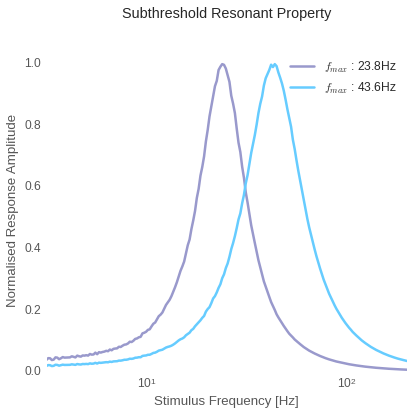

In [12]:
# --------------------------------------------------------------------------------
# plot subthreshold resonance
# --------------------------------------------------------------------------------
fig = plt.figure(figsize=(6,6))
tauv=45
ax01 = fig.add_subplot(111)
F = np.logspace(0.5, 2.3, 200)
mod = resonanceFS(tauv=tauv)
mod15 = resonanceFS(tauv=15)
ax01.semilogx(F, mod / np.nanmax(mod), label='$f_{max}$ : %.1fHz' % (F[np.argmax(mod)]), color='#9999cc')
ax01.semilogx(F, mod15 / np.nanmax(mod15), label='$f_{max}$ : %.1fHz' % (F[np.argmax(mod15)]), color='#66ccff')
ax01.set_ylim([0, 1.05])
ax01.set_xlabel('Stimulus Frequency [Hz]')
ax01.set_ylabel('Normalised Response Amplitude')
ax01.set_xlim([0, 200])
ax01.set_title('Subthreshold Resonant Property', y=1.08)
ax01.legend()
plt.tight_layout()
plt.savefig(PAPER + '2resonances.svg')

In [17]:
def readMatrix(path=''):
    # simulation parameters
    with open(path) as file:
        array2d = [[float(digit) for digit in line.split()] for line in file]
    return array2d

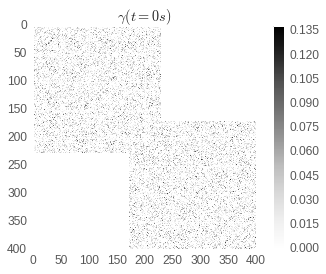

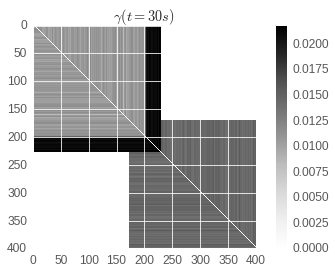

In [34]:
# --------------------------------------------------------------------------------
# PLot weights
# --------------------------------------------------------------------------------
# Instantiate classes

data_path = '/mnt/DATA/gp1514/Projects/github/cortex/data/olddata/'


GAP2D0 = readMatrix(data_path + 'GAP0_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-28_sWII-10_tauv-59_0.txt')
GAP2D = readMatrix(data_path + 'GAP_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-28_sWII-10_tauv-59_0.txt')

fig = plt.figure(figsize=(6,4))
ax1 = plt.subplot(111)
im1 = ax1.imshow(np.array(GAP2D0), interpolation='nearest')
ax1.set_title(r'$\gamma(t = 0s)$')
fig.colorbar(im1)
plt.savefig(PAPER + 'weights_0.svg')

fig = plt.figure(figsize=(6,4))
ax2 = plt.subplot(111)
im2 = ax2.imshow(np.array(GAP2D), interpolation='nearest')
ax2.set_title(r'$\gamma(t = 30s)$')
fig.colorbar(im2)
plt.tight_layout()
plt.savefig(PAPER + 'weights_end.svg')

In [5]:
tauv, sG, N, T, nu = 15, 50, 2000, 50000, 0
rasterPath = "rasterPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d" % (tauv, sG, N, T, nu)
r = np.load(rasterPath)
varPath = "rastervarPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d" % (tauv, sG, N, T, nu)
var = np.load(varPath)

FileNotFoundError: [Errno 2] No such file or directory: 'rasterPlast-tauv-15_g-50_N-2000_T-50000_k-0'

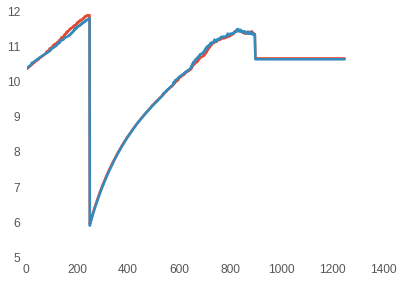

In [14]:
plt.plot(var['g1'])
plt.plot(var['g2'])

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


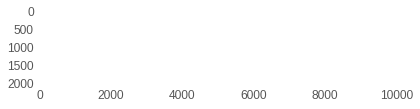

In [8]:
plt.imshow(r[:, 4e4:5e4])

## RASTERS

In [90]:
def getSpikes(tauv, sg):
    data_path = '/mnt/DATA/gp1514/Projects/github/cortex/data/olddata/'
    path_x = (data_path + 'spike_x_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-%d_sWII-10_tauv-%d_0.txt'%(sg,tauv))
    path_y = (data_path + 'spike_y_g-10_TImean-30_T-30020_Glob-0_dt-0.25_N-400_r-0_S-100_WII-1400_LTD-0.00188_LTP-0.0282_model-gp-izh-subnetworks_sG-%d_sWII-10_tauv-%d_0.txt'%(sg,tauv))
    spikes_x = np.fromfile(path_x, dtype='uint', count=-1, sep=" ")
    spikes_y = np.fromfile(path_y, dtype='uint', count=-1, sep=" ")
    return spikes_x, spikes_y


In [17]:
def plotRaster(spikes_x, spikes_y, ax=None, titlestr=""):
    if not ax:
        f = plt.figure(figsize=(4, 3))
        ax = f.add_subplot(111)
    # ax.set_xticks([])
    # ax.set_yticks([0,300])
    # ax.set_xlabel('Time [1.5s]')
    # ax.set_ylabel('Neuron indices [0-300]')
    # ax.set_title('Neuronal Activity')
    if ax == None:
        plt.plot(spikes_x, spikes_y, '.', markersize=1, color='grey')
        plt.title(titlestr, y=1.08)
    else:
        ax.plot(spikes_x, spikes_y, '.', markersize=1, color='grey')
        ax.set_title(titlestr, y=1.08)
    return ax
    # plt.savefig(DIRECTORY + extension + '_raster.pdf')
    # plt.savefig(DIRECTORY + extension + '_raster.png')

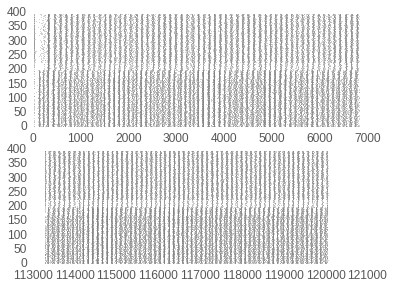

In [21]:
N=1000
#--------------------------------------------------------------------------------
# RASTER PLOT begin and end of simulation
#--------------------------------------------------------------------------------
fig= plt.figure(figsize=(6,4.5))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plotRaster(spikes_x[0:50*N], spikes_y[0:50*N], ax=ax1)
plotRaster(spikes_x[-50*N:], spikes_y[-50*N:], ax=ax2)

/mnt/DATA/gp1514/.pyenv/versions/anaconda3-4.1.0/lib/python3.5/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


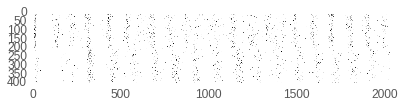

In [51]:
lim = 15000
sp =np.zeros([400, np.max(spikes_x[:lim])+1])
sp[spikes_y[:lim], spikes_x[:lim]]=1
plt.imshow(sp)

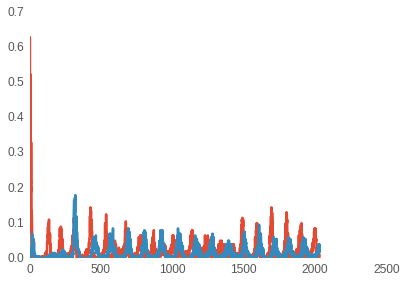

In [89]:
N = 400
plt.plot(np.mean(sp[:N//2,:], axis=0))
plt.plot(np.mean(sp[N//2:,:], axis=0))

In [58]:
def find(arr,v):
    idx = (np.abs(arr - v)).argmin()
    return idx

In [79]:
def plotRaster(spikes_x, spikes_y, xmin, xmax):
    plt.figure()
    vmin = find(spikes_x, xmin)
    vmax = find(spikes_x, xmax)
    
    spx = spikes_x[vmin:vmax]
    spy = spikes_y[vmin:vmax]
    
    sp =np.zeros([400, xmax])
    sp[spy, spx]=1
    plt.imshow(sp)
    plt.xlim([xmin,xmax])
    plt.yticks([])

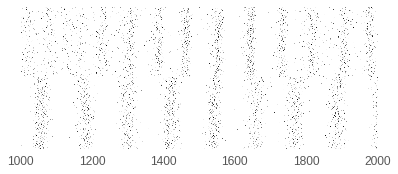

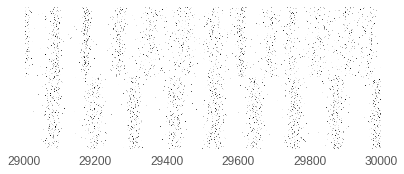

In [93]:
spikes_x, spikes_y = getSpikes(45,0)

plotRaster(spikes_x, spikes_y, 1000, 2000)
plotRaster(spikes_x, spikes_y, 29000, 30000)

## TEST & DEBUG

In [1]:
g = 7
N = 2000
T = 60000
nu = 100
sG = 200
tauv = 45
gpu = TfConnEvolveNet(N=N,
                  T=T,
                  disp=False,
                  tauv=tauv,
                  device='/gpu:0',
                  spikeMonitor=True,
                  g0=g,
                  startPlast = 0,
                  nu = nu,
                  NUM_CORES = 1,
                  both=True,
                 sG = sG,
                      )
# gpu.input = apple
gpu.debug = False
gpu.connectTime=500
gpu.runTFSimul()

filename = "rastervarPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d" % (tauv, sG, N, T, nu)
with open(filename, 'wb') as f:
    four = fourier(gpu.vvm[100:])
    np.savez(f,
             vvm=gpu.vvm,
             im=gpu.im,
             freq=four[0],
             power=four[1],
             gamma=gpu.gamma,
             )

filename = "rasterPlast-tauv-%d_g-%d_N-%d_T-%d_k-%d" % (tauv, sG, N, T, nu)
with open(filename, 'wb') as f:
    r = np.array(gpu.raster)
    r = r.reshape(r.shape[0], r.shape[1]).transpose()
    np.save(f, r)

NameError: name 'TfConnEvolveNet' is not defined

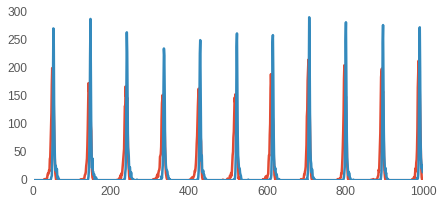

In [34]:
t0=9000
t1=10000

### DEBUG UNSTABILITY
### note: when connecting subnetworks, jump in I from additional 
### spikelets creates unstability
# plt.figure(figsize=(7,3))
# plt.plot(gpu.vvmN2[t0:t1]/np.max(gpu.vvmN2))
# plt.plot(gpu.wcontrol[t0:t1]/np.max(gpu.wcontrol), label='wcontrol')
# plt.legend()
# plt.plot(gpu.dwcontrol[t0:t1]/np.max(gpu.dwcontrol))
# plt.plot(gpu.LTDcontrol[t0:t1])
# plt.plot(gpu.LTPcontrol[t0:t1])

plt.figure(figsize=(7,3))
plt.plot(gpu.vvmN1[t0:t1])
plt.plot(gpu.vvmN2[t0:t1])

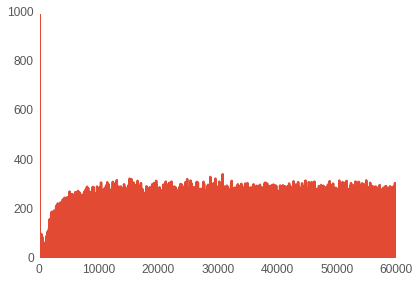

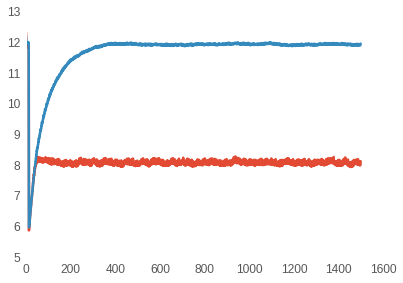

In [35]:
plt.plot(gpu.vvmN2)
plt.figure()
plt.plot(gpu.gammaN1)
plt.plot(gpu.gammaN2)

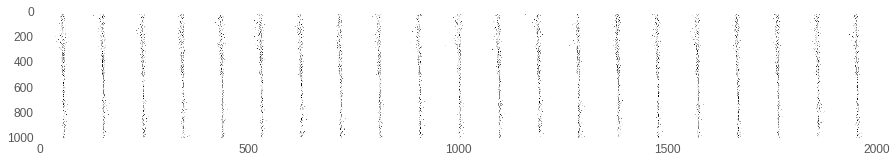

In [33]:
r = np.load(filename)
plt.figure(figsize=(15,4))
plt.imshow(r[500:1500, 58000:60000], aspect=0.3)

In [42]:
# for k in np.arange(0,200,10):
#     a = np.load('../data/GetGammaSteadyState/GetSteadyState4-tauv-15_g-7_N-1000_T-40000_k-%d'%k)
#     plt.plot(k,a['gamma'][-1]*2, '.')

In [8]:
df = pd.DataFrame(columns=('nu','tauv','ratio','g','N','gamma') )

i=0
N=1000
T = 5000
rList = [1,3,5,10,50,100]
nuList = range(0,200,10)
for nu in nuList:
    for tauv in [15, 30, 45, 60, 90]:
            for ratio in rList:
                for g in [14]:
                    i+=1
                    filename = "../data/GetGammaSteadyState/GetSteadyState8-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%d" % (tauv, g, N, T, nu, ratio)
                    a = np.load(filename)
                    df.loc[i] = [nu, tauv, ratio, g, N, a['gamma'][-1]]

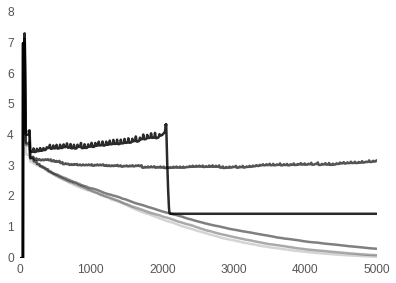

In [7]:
tauv = 15
T = 5000
nu = 190

for i, ratio in enumerate(rList):
    filename = "../data/GetGammaSteadyState/GetSteadyState8-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%d" % (tauv, g, N, T, nu, ratio)
    a = np.load(filename)
    plt.plot(a['gamma'], c='black', alpha=i/len(rList))

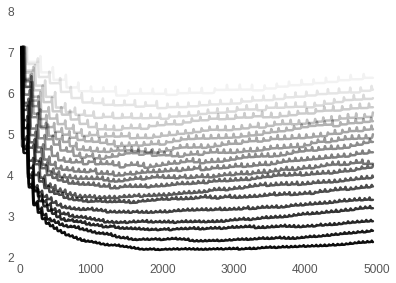

In [16]:
tauv = 30
T = 5000
nu = 100
ratio = 50
for i, nu in enumerate(nuList):
    filename = "../data/GetGammaSteadyState/GetSteadyState8-tauv-%d_g-%d_N-%d_T-%d_nu-%d_ratio-%d" % (tauv, g, N, T, nu, ratio)
    a = np.load(filename)
    plt.plot(a['gamma'][50:], c='black', alpha=i/len(nuList))

In [38]:
[df.duplicated()]

,nu,tauv,ratio,g,N,gamma


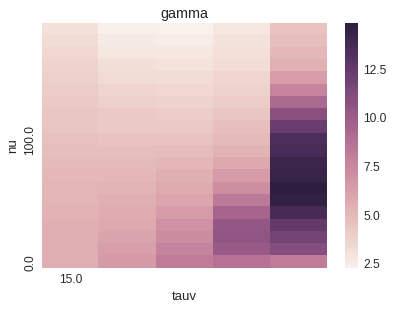

In [18]:
plotHeatmap(df[df['ratio']==50], col='gamma', x='tauv',y='nu')

In [8]:
N, g, tauv, i, nu = 1000, 7,15,0,200
T = 2500


gpu = TfSingleNet(N=N,
                  T=T,
                  disp=False,
                  tauv=tauv,
                  device='/gpu:0',
                  spikeMonitor=False,
                  g0=g,
                  startPlast = 50,
                  nu = nu,
                  NUM_CORES = 1)
# gpu.input = apple
print(gpu.lowspthresh)
gpu.lowspthresh = 1.5
gpu.ratio = 100
gpu.FACT = 100
gpu.runTFSimul()

1.5
11.58


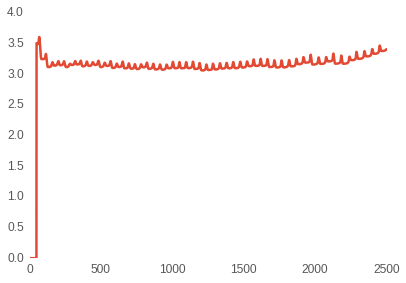

In [9]:
plt.plot(gpu.gamma)